# Multivariate time series forecasting

In [1]:
# loading essential libraries first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

plt.style.use('seaborn')
blue = '#3949AB'
orange = 'darkorange'

In [2]:
file_path = '../data/hourly_features.csv'
cols_to_use = ['date', 'vader_score', 'g_trends', 'volume', 'close']
all_data = pd.read_csv(file_path,
                       index_col='date',
                       usecols=cols_to_use,
                       parse_dates=True)
all_data.info()
all_data.head(3)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 677 entries, 2021-02-21 00:00:00 to 2021-03-20 23:00:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close        677 non-null    float64
 1   volume       677 non-null    float64
 2   g_trends     677 non-null    int64  
 3   vader_score  677 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 26.4 KB


,close,volume,g_trends,vader_score
date,,,,
2021-02-21 00:00:00,55834.95,2949.777561,72,154319.02855
2021-02-21 01:00:00,56347.69,2125.263288,72,102026.76434
2021-02-21 02:00:00,56318.08,2201.031649,72,182005.34381


In [3]:
data = all_data.reset_index(drop=True)

## Vector Autoregressive model (VAR)

We will calculate predictions for Bitcoin closing prices with a vector autorregressive model provided by `statsmodels` library.

### Causality

We are going to run Granger Causality test to check any causality between the dependent varaible and the independent variables.

There is causation when the p-value is less than 0.05.

In [4]:
def granger_test(series1, series2, n_lags=1):
    """It performs Granger Causality test. It returns test results.
    
    Parameters
    ----------
    series1 : pd.Series. it is supposed to be caused by series2
    series2 : pd.Series.
    """
    df = pd.DataFrame(data=zip(series1.values, series2.values))
    grangercausalitytests(df, n_lags)

#### Bitcoin close price vs Twitter sentiment scores

In [5]:
# Do sentiment scores cause Bitcoin price variations?
granger_test(data['close'], data['vader_score'], 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9266  , p=0.3361  , df_denom=673, df_num=1
ssr based chi2 test:   chi2=0.9307  , p=0.3347  , df=1
likelihood ratio test: chi2=0.9300  , p=0.3349  , df=1
parameter F test:         F=0.9266  , p=0.3361  , df_denom=673, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5087  , p=0.6015  , df_denom=670, df_num=2
ssr based chi2 test:   chi2=1.0249  , p=0.5990  , df=2
likelihood ratio test: chi2=1.0242  , p=0.5992  , df=2
parameter F test:         F=0.5087  , p=0.6015  , df_denom=670, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5563  , p=0.6441  , df_denom=667, df_num=3
ssr based chi2 test:   chi2=1.6863  , p=0.6400  , df=3
likelihood ratio test: chi2=1.6842  , p=0.6404  , df=3
parameter F test:         F=0.5563  , p=0.6441  , df_denom=667, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5366  , p=0.7089  

In [6]:
# Do Bitcoin prices cause sentiment scores variations?
granger_test(data['vader_score'], data['close'], 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6145  , p=0.4334  , df_denom=673, df_num=1
ssr based chi2 test:   chi2=0.6173  , p=0.4321  , df=1
likelihood ratio test: chi2=0.6170  , p=0.4322  , df=1
parameter F test:         F=0.6145  , p=0.4334  , df_denom=673, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3469  , p=0.7070  , df_denom=670, df_num=2
ssr based chi2 test:   chi2=0.6990  , p=0.7051  , df=2
likelihood ratio test: chi2=0.6986  , p=0.7052  , df=2
parameter F test:         F=0.3469  , p=0.7070  , df_denom=670, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.0344  , p=0.0287  , df_denom=667, df_num=3
ssr based chi2 test:   chi2=9.1986  , p=0.0268  , df=3
likelihood ratio test: chi2=9.1364  , p=0.0275  , df=3
parameter F test:         F=3.0344  , p=0.0287  , df_denom=667, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.3291  , p=0.0548  

#### Bitcoin close price vs Google trends on Bitcoin

In [7]:
# Do Google trends on Bitcoin cause Bitcoin price variations?
granger_test(data['close'], data['g_trends'], 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0132  , p=0.9086  , df_denom=673, df_num=1
ssr based chi2 test:   chi2=0.0132  , p=0.9084  , df=1
likelihood ratio test: chi2=0.0132  , p=0.9084  , df=1
parameter F test:         F=0.0132  , p=0.9086  , df_denom=673, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5820  , p=0.5591  , df_denom=670, df_num=2
ssr based chi2 test:   chi2=1.1727  , p=0.5564  , df=2
likelihood ratio test: chi2=1.1716  , p=0.5566  , df=2
parameter F test:         F=0.5820  , p=0.5591  , df_denom=670, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4309  , p=0.7310  , df_denom=667, df_num=3
ssr based chi2 test:   chi2=1.3062  , p=0.7277  , df=3
likelihood ratio test: chi2=1.3049  , p=0.7280  , df=3
parameter F test:         F=0.4309  , p=0.7310  , df_denom=667, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2848  , p=0.8879  

In [8]:
# Do Bitcoin price variations cause Google trends on Bitcoin
granger_test(data['g_trends'], data['close'], 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5439  , p=0.4611  , df_denom=673, df_num=1
ssr based chi2 test:   chi2=0.5463  , p=0.4598  , df=1
likelihood ratio test: chi2=0.5461  , p=0.4599  , df=1
parameter F test:         F=0.5439  , p=0.4611  , df_denom=673, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3712  , p=0.6900  , df_denom=670, df_num=2
ssr based chi2 test:   chi2=0.7480  , p=0.6880  , df=2
likelihood ratio test: chi2=0.7476  , p=0.6881  , df=2
parameter F test:         F=0.3712  , p=0.6900  , df_denom=670, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7922  , p=0.1473  , df_denom=667, df_num=3
ssr based chi2 test:   chi2=5.4331  , p=0.1427  , df=3
likelihood ratio test: chi2=5.4113  , p=0.1440  , df=3
parameter F test:         F=1.7922  , p=0.1473  , df_denom=667, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7044  , p=0.1472  

After running Granger Causality tests on our features, it looks like Bitcoin close hourly prices are not caused by Twitter sentiment scores nor Google Trends. 

In fact, p-value is closer to 0.05 when the test is run on Bitcoin closing prices causing both, sentiment scores and Google Trends. This would mean that social media sentiments and Google searches are influenced by Bitcoin prices rather than the other way around.

### Check for Stationarity

A Stationary series is one whose mean and variance do not change with time, therefore, a non-stationary series has trends. The Vector Autoregression model (VAR) requires the data to be stationary. We will have to get rid of stationarity.

Augmented Dickey-Fuller (ADF) test is used to check for stationarity.

In [9]:
# We split our data in training and test sets
obs = round(len(data) * 0.1)

train = data[:-obs]
test = data[-obs:]

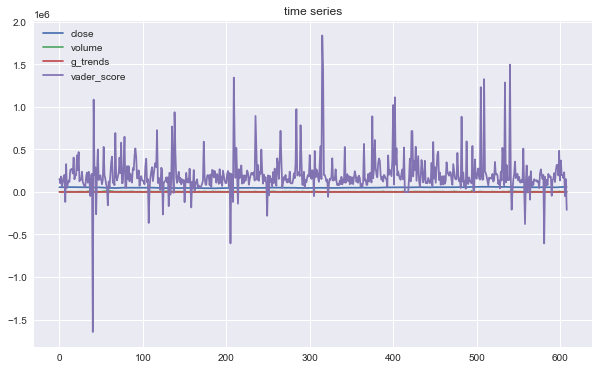

In [10]:
# First thing to do is plotting our time series to get the big picture
train.plot(figsize=(10, 6), title='time series')

First thing to note is that y scale is ridiculously big so we need to normalize the data in order to get values near 0.

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(scaled, columns=data.columns)

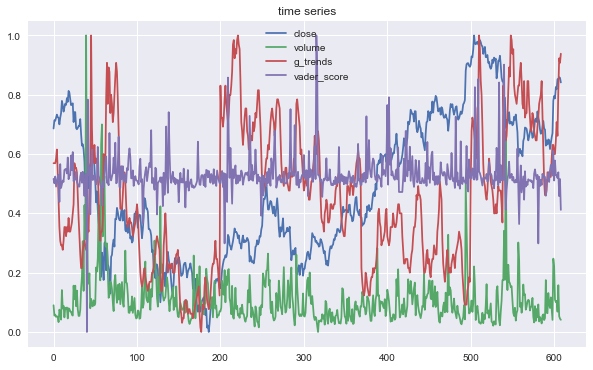

In [12]:
train_scaled.plot(figsize=(10, 6), title='time series')

In [13]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    """It performs Augmented Dickey-Fuller test on a pd.Series and prints the results"""
    adf = adfuller(series)
    print('ADF Statistic: %.3f' % adf[0])
    print('p-value: %.2f' % adf[1])
    if adf[1] < 0.05:
        print('Series is Stationary')
    else:
        print('Series is Non-Stationary')

In [14]:
for column in train_scaled.columns:
    print('\t' + column)
    adf_test(train_scaled[column])
    print('-' * 25)

	close
ADF Statistic: -1.173
p-value: 0.69
Series is Non-Stationary
-------------------------
	volume
ADF Statistic: -8.128
p-value: 0.00
Series is Stationary
-------------------------
	g_trends
ADF Statistic: -3.062
p-value: 0.03
Series is Stationary
-------------------------
	vader_score
ADF Statistic: -12.393
p-value: 0.00
Series is Stationary
-------------------------


We can conclude after running Augmented Dickey-Fuller test on our variables that Bitcoin close price is non-stationary, whereas the independent variables are, as they seemed to be.

For time series modeling, data needs to be stationary — meaning if there is a trend in the data we need to get rid of it. We can do so by taking differences.

In [15]:
# We make the series stationary by taking differences
train_diff = train_scaled.diff().dropna()

In [16]:
# We check for stationarity again
for column in train_diff.columns:
    print('\t' + column)
    adf_test(train_diff[column])
    print('-' * 25)

	close
ADF Statistic: -26.481
p-value: 0.00
Series is Stationary
-------------------------
	volume
ADF Statistic: -9.490
p-value: 0.00
Series is Stationary
-------------------------
	g_trends
ADF Statistic: -7.940
p-value: 0.00
Series is Stationary
-------------------------
	vader_score
ADF Statistic: -9.397
p-value: 0.00
Series is Stationary
-------------------------


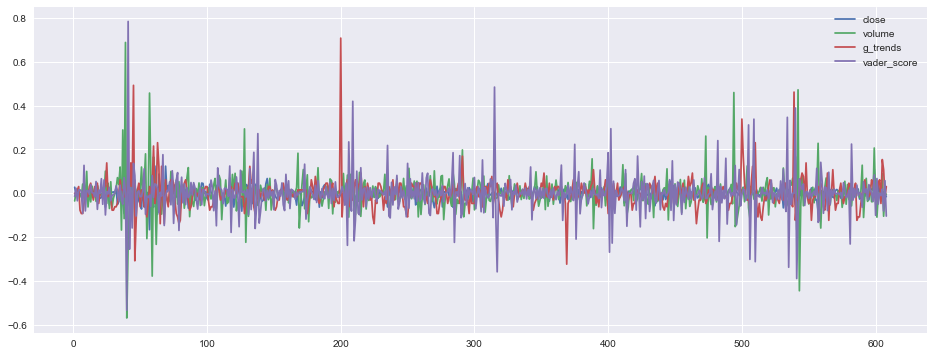

In [17]:
train_diff.plot(figsize=(16, 6))

Now we've got our stationarity problem solved. Let's keep going!

### Build the model

The Vector Autorregressive model returns forecasts for each one of the features passed to the model based on the relations between each one of them.

We are most interested in Bitcoin price forecast.

In [18]:
model = VAR(train_diff)
results = model.fit(maxlags=15, ic='aic')
results.summary()

C:\Users\Javi\Anaconda3\envs\crypto-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 12, May, 2021
Time:                     23:22:32
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -22.3736
Nobs:                     602.000    HQIC:                  -22.8201
Log likelihood:           3637.67    FPE:                9.24466e-11
AIC:                     -23.1046    Det(Omega_mle):     7.85610e-11
--------------------------------------------------------------------
Results for equation close
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.000203         0.001204            0.169           0.866
L1.close              -0.061071         0.041449           -1.473           0.141
L1.volume              0.017947         0.016967        

In [19]:
lag_order = results.k_ar
lag_order

6

In [20]:
# Forecasting
predicted = results.forecast(train_diff.values[-lag_order:], obs)
forecast_diff = pd.DataFrame(data=predicted,
                        columns=data.columns)
forecast_diff.head()

,close,volume,g_trends,vader_score
0,0.010946,0.019855,-0.004368,0.095623
1,0.000590,-0.029739,-0.038347,-0.017891
2,-0.000410,0.008594,0.020449,-0.006228
3,0.007825,0.001022,-0.028308,0.005011
4,-0.003305,-0.001150,-0.010777,-0.002388


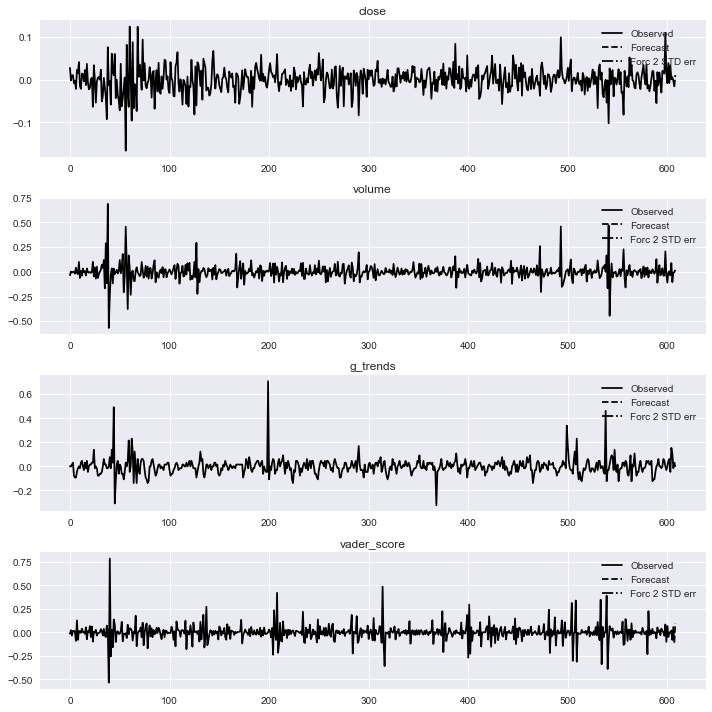

In [21]:
# Ploting results
p1 = results.plot_forecast(1)
p1.tight_layout()

In [22]:
# Inverting the diff transformation
def invert_diff(df_train_diff, df_forecast):
    """It undoes diff transformation."""
    for col in df_train_diff.columns:
        df_forecast[col] = df_train_diff[col].iloc[-1] + df_forecast[col].cumsum()

    return df_forecast

forecast_scaled = invert_diff(train_scaled, forecast_diff)
forecast_values = pd.DataFrame(scaler.inverse_transform(forecast_scaled), columns=train.columns)

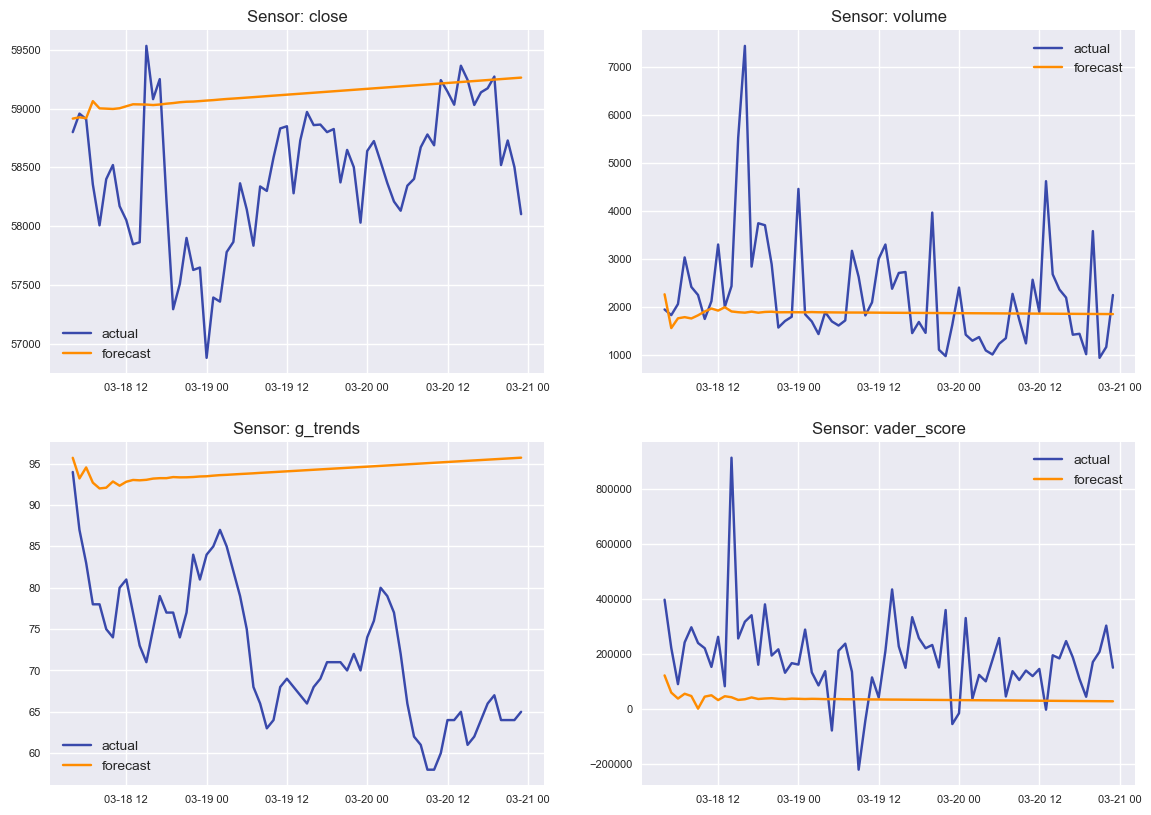

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=100, figsize=(14,10))
x_axis = all_data.index[-obs:]

for i, (column, ax) in enumerate(zip(data.columns, axes.flatten())):
    
    ax.plot(x_axis, data[column][-obs:].values, color=blue, label='actual')
    ax.plot(x_axis, forecast_values[column], color=orange, label='forecast')

    ax.set_title('Sensor: ' + column)

    ax.tick_params(labelsize = 8)
    ax.legend()

In [24]:
# Metrics

rmse = math.sqrt(mean_squared_error(test['close'], forecast_values['close']))
mae = mean_absolute_error(test['close'], forecast_values['close'])

print(f'RMSE: %.2f' % rmse)
print(f'MAE: %.2f' % mae)

RMSE: 850.45
MAE: 690.76


In [25]:
# For streamlit purposes
var_forecast = pd.DataFrame()
var_forecast['date'] = all_data.index[-obs:]
var_forecast['actual'] = test['close'].reset_index(drop=True)
var_forecast['forecast'] = forecast_values['close']
var_forecast.head()
# var_forecast.to_csv('../data/forecasts/var.csv', index=False)

,date,actual,forecast
0,2021-03-18 04:00:00,58800.01,58915.143951
1,2021-03-18 05:00:00,58957.44,58926.071949
2,2021-03-18 06:00:00,58910.00,58918.468583
3,2021-03-18 07:00:00,58355.15,59063.463488
4,2021-03-18 08:00:00,58007.11,59002.225593
